In [1]:
# This Jupyter notebook will demonstrate how to use python and pandas to make a publication-quality 
# barplot figure from an Admixture analysis. The required input files are the ped 
# file used to run admixture and an output Q file from the analysis.

# To run this notebook, you will need to specify the paths to these files. 
# You will also need to have the python packages pandas (https://pandas.pydata.org/)
# and seaborn (https://seaborn.pydata.org/) available.

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#############################################################################
# First step is to read in the PED and Q files as pandas dataframes

In [4]:
# full path to the PED file used for Admixture
fileped = '/Users/portik/Documents/GitHub/Pandas-for-Population-Structure-Barplots/data/inputs/Trachylepis_recoded.ped'

# full path to the Q file to use for plotting
fileq = '/Users/portik/Documents/GitHub/Pandas-for-Population-Structure-Barplots/data/inputs/Trachylepis_recoded.4.Q'

In [5]:
# read in ped file as dataframe, this file is delimited by whitespace
df_ped = pd.read_csv(fileped, sep=' ', header=None)

# read in the Q file, which is also whitespace delimited 
df_q = pd.read_csv(fileq, sep=' ', header=None)

In [6]:
# this is what the PED dataframe looks like
df_ped

# the sample names in a PED file should be in the first column:

,0,1,2,3,4,5,6,7,8,9,...,902,903,904,905,906,907,908,909,910,911
0,mlanjensis_Q0052,mlanjensis_Q0052,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,mlanjensis_QQ0357,mlanjensis_QQ0357,0,0,0,0,2,2,0,0,...,2,2,2,2,2,2,2,2,2,2
2,mlanjensis_QQ0656,mlanjensis_QQ0656,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,punctatissima_JM1601,punctatissima_JM1601,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,punctatissima_JM1604,punctatissima_JM1604,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,wahlbergii_TB33,wahlbergii_TB33,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
129,wahlbergii_WC12A055,wahlbergii_WC12A055,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
130,wahlbergii_WC12A067,wahlbergii_WC12A067,0,0,0,0,2,2,0,0,...,2,2,0,0,2,2,2,2,2,2
131,wahlbergii_WC12A111,wahlbergii_WC12A111,0,0,0,0,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [7]:
# and this is what a Q file dataframe looks like
df_q

# notice there are no sample names here

,0,1,2,3
0,0.000010,0.038671,0.961309,0.000010
1,0.000010,0.000010,0.999970,0.000010
2,0.000010,0.029508,0.970472,0.000010
3,0.112875,0.269307,0.000010,0.617808
4,0.052985,0.665164,0.000010,0.281841
...,...,...,...,...
128,0.000010,0.000010,0.000010,0.999970
129,0.000010,0.000010,0.000010,0.999970
130,0.000010,0.000010,0.000010,0.999970
131,0.000010,0.000010,0.000010,0.999970


In [8]:
#############################################################################
# We now need to make some edits to the Q dataframe to prepare it for plotting. 
# First, it needs column labels and the sample names. After that, we need 
# to assign each sample to a population, and add that as another 
# column. With all of that information, we can make the high quality barplots!

In [9]:
# Here we are adding labels to the population proportion columns, and 
# adding a new column with the sample names from the ped file.

# automatically generate column names based on number of columns in Q (pop1, pop2, pop3, etc.)
names = ["pop{}".format(i) for i in range(1, df_q.shape[1]+1)]

# add column names to dataframe
df_q.columns = names

# insert the sample names into the first column position
df_q.insert(0, 'Sample', df_ped[0])

# now  set the dataframe index to the sample names (e.g., the 'Sample' column)
df_q.set_index('Sample', inplace=True)


In [10]:
# Check what this did to the q dataframe:
df_q

,pop1,pop2,pop3,pop4
Sample,,,,
mlanjensis_Q0052,0.000010,0.038671,0.961309,0.000010
mlanjensis_QQ0357,0.000010,0.000010,0.999970,0.000010
mlanjensis_QQ0656,0.000010,0.029508,0.970472,0.000010
punctatissima_JM1601,0.112875,0.269307,0.000010,0.617808
punctatissima_JM1604,0.052985,0.665164,0.000010,0.281841
...,...,...,...,...
wahlbergii_TB33,0.000010,0.000010,0.000010,0.999970
wahlbergii_WC12A055,0.000010,0.000010,0.000010,0.999970
wahlbergii_WC12A067,0.000010,0.000010,0.000010,0.999970


In [11]:
# Next we want to assign each individual to a population, based on highest proportion of ancestry.
# For each row, we find the column with the greatest value, then assign it that column label value
# in a new column called 'assignment'.
df_q['assignment'] = df_q.idxmax(axis=1)

In [12]:
# we can see this new column now, with the assignments provided
df_q

,pop1,pop2,pop3,pop4,assignment
Sample,,,,,
mlanjensis_Q0052,0.000010,0.038671,0.961309,0.000010,pop3
mlanjensis_QQ0357,0.000010,0.000010,0.999970,0.000010,pop3
mlanjensis_QQ0656,0.000010,0.029508,0.970472,0.000010,pop3
punctatissima_JM1601,0.112875,0.269307,0.000010,0.617808,pop4
punctatissima_JM1604,0.052985,0.665164,0.000010,0.281841,pop2
...,...,...,...,...,...
wahlbergii_TB33,0.000010,0.000010,0.000010,0.999970,pop4
wahlbergii_WC12A055,0.000010,0.000010,0.000010,0.999970,pop4
wahlbergii_WC12A067,0.000010,0.000010,0.000010,0.999970,pop4


In [13]:
#############################################################################
# Now it is time to make the plots. First up is choosing a color scheme, followed 
# by some stacked barplots. We will first create a plot from an unsorted Q 
# dataframe. Then, we will use a custom sorting function to produce better looking 
# plots, and save them as PDF files.

In [14]:
# To make plotting easier we can set the color palette here. 

# For palette ideas and color schemes, please refer to the seaborn 
# documentation: https://seaborn.pydata.org/tutorial/color_palettes.html
# I really like the Paired, tab10, tab20, and tab20c palettes. To set those 
# instead, you could use:
# pal = sns.color_palette("Paired", 4)
# The number following the palette name specifies the number of colors to select.

# I chose a color palette based on what I found using: https://colorbrewer2.org/

pal = sns.color_palette(['#ef8a62','#92c5de','#fddbc7','#0571b0'])
pal

[(0.9372549019607843, 0.5411764705882353, 0.3843137254901961),
 (0.5725490196078431, 0.7725490196078432, 0.8705882352941177),
 (0.9921568627450981, 0.8588235294117647, 0.7803921568627451),
 (0.0196078431372549, 0.44313725490196076, 0.6901960784313725)]

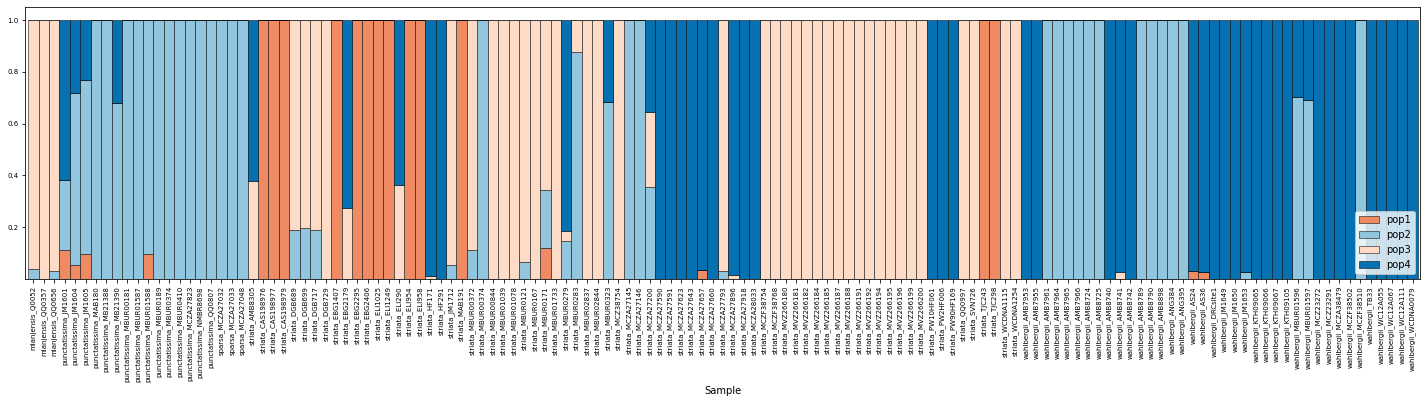

In [15]:
#############################################################################
# We will start by creating a stacked barplot for the unsorted Q dataframe.
# The plotting arguments are all explained below, and some values may need to be adjusted 
# based on your dataset qualities (for example, the width and height of plot, and 
# sample label sizes).



# Create the stacked bar plot using the pandas .plot.bar() function with the following args:

# stacked: controls whether or not to create a stacked barplot
# figsize: the dimensions of the figure, in (width, height)
# width: this controls the width of the bars, 1 = no separation between them, <1 puts spacing in
# color: sets the colors, we refer to pal which was set above
# fontsize: the size of sample labels (values = xx-small, x-small, small, medium, large, x-large, xx-large)
# edgecolor: controls the color of lines separating colors within bars, as well as bar outline
# linewidth: the line size for the edgecolor

ax = df_q.plot.bar(stacked=True, 
                    figsize=(25,5), 
                    width=1,
                    color=pal, 
                    fontsize='x-small',
                    edgecolor='black', 
                    linewidth=0.5)


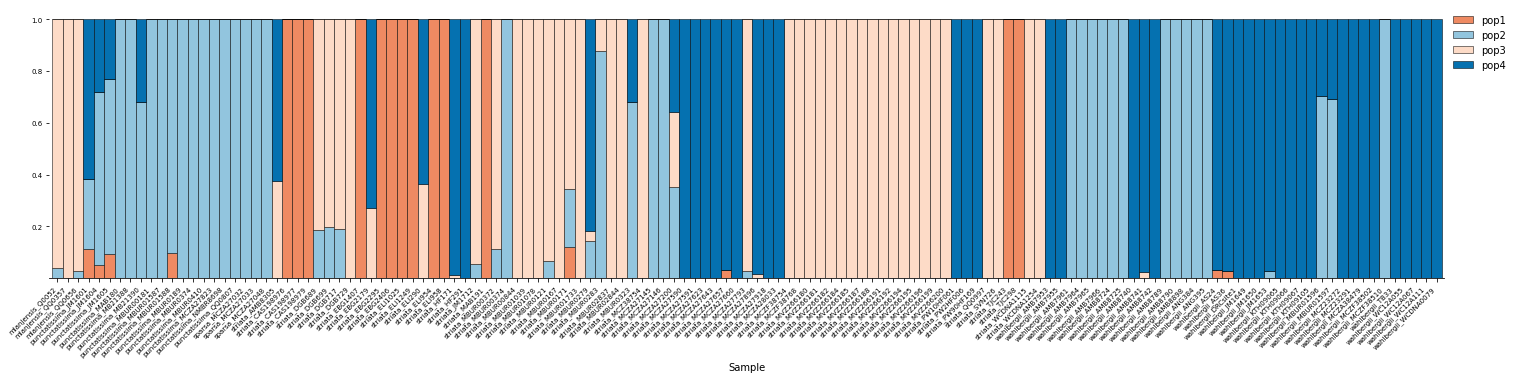

In [16]:
# We can clean up some aspects of this plot using some additional commands: 
# 1) remove the bounding box around the figure,
# 2) rotate the sample labels,
# 3) change legend placement and look.

ax = df_q.plot.bar(stacked=True, 
                    figsize=(25,5), 
                    width=1,
                    color=pal, 
                    fontsize='x-small',
                    edgecolor='black', 
                    linewidth=0.5)

# 1) these commands eliminate the bounding box for the barplot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# 2) this controls rotation of the sample names along the x-axis
ax.set_xticklabels(df_q.index, rotation=45, ha='right')

# 3) this controls the placement of the legend, as well as 
# font (fontsize), spacing (labelspacing), and bounding box (frameon)
ax.legend(bbox_to_anchor=(1,1), fontsize='medium', labelspacing=0.5, frameon=False)


In [17]:
#############################################################################
# That's looking better! However the main issue is that the populations need to be sorted. 
# This can be attempted using a built-in sort method with pandas. It sorts in the order of 
# the columns provided in a list.

df_q_sorted = df_q.sort_values(['assignment', 'pop1','pop2','pop3','pop4'], ascending=True)

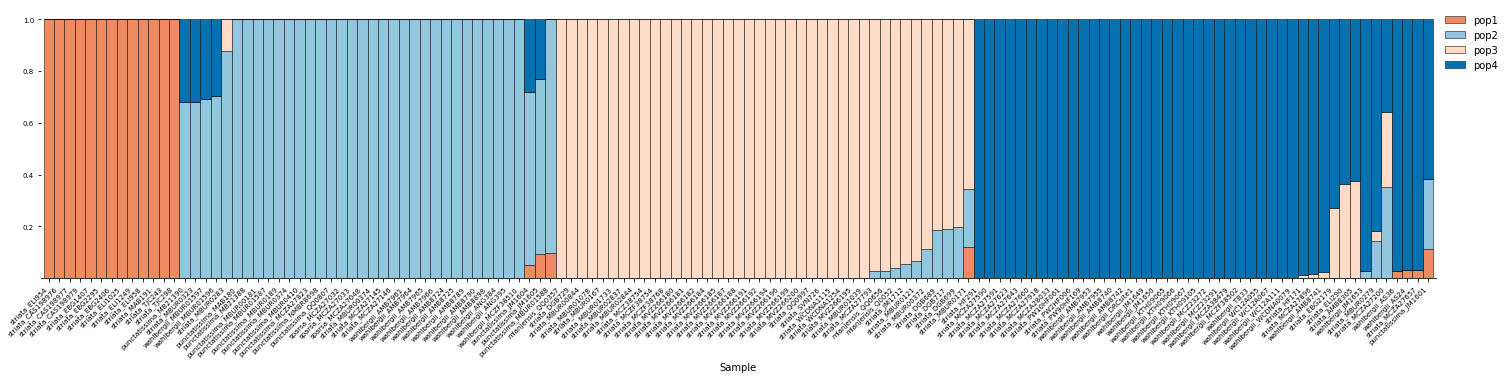

In [18]:
# Let's see how well this method was able to sort:

ax = df_q_sorted.plot.bar(stacked=True, 
                    figsize=(25,5), 
                    width=1,
                    color=pal, 
                    fontsize='x-small',
                    edgecolor='black', 
                    linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels(df_q_sorted.index, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1,1), fontsize='medium', labelspacing=0.5, frameon=False)


In [19]:
# It's looking better, but the plot isn't quite right. There are a few individuals 
# that seem out of place. 


#############################################################################
# A better way to sort is to pull out each population subset from the dataframe,
# and sort them individually. After each subset is sorted, they can be merged 
# into a complete dataframe again.

# Here is a function for better sorting of the dataframes.
def sort_df_by_pops(df):
    temp_dfs = []
    for pop in sorted(df['assignment'].unique()):
        temp = df.loc[df['assignment'] == pop].sort_values(by=[pop], ascending=False)
        temp_dfs.append(temp)
    return pd.concat(temp_dfs)

In [20]:
# We can now use the function to sort the Q dataframe:

df_sorted_q = sort_df_by_pops(df_q)

In [21]:
# Let's see what this did:
df_sorted_q

,pop1,pop2,pop3,pop4,assignment
Sample,,,,,
striata_CAS198976,0.999970,0.000010,0.000010,0.000010,pop1
striata_CAS198977,0.999970,0.000010,0.000010,0.000010,pop1
striata_CAS198979,0.999970,0.000010,0.000010,0.000010,pop1
striata_EBG1407,0.999970,0.000010,0.000010,0.000010,pop1
striata_EBG2295,0.999970,0.000010,0.000010,0.000010,pop1
...,...,...,...,...,...
striata_EBG2179,0.000010,0.000010,0.272635,0.727345,pop4
striata_ELI290,0.000010,0.000010,0.364639,0.635341,pop4
striata_AMB8305,0.000010,0.000010,0.376837,0.623143,pop4


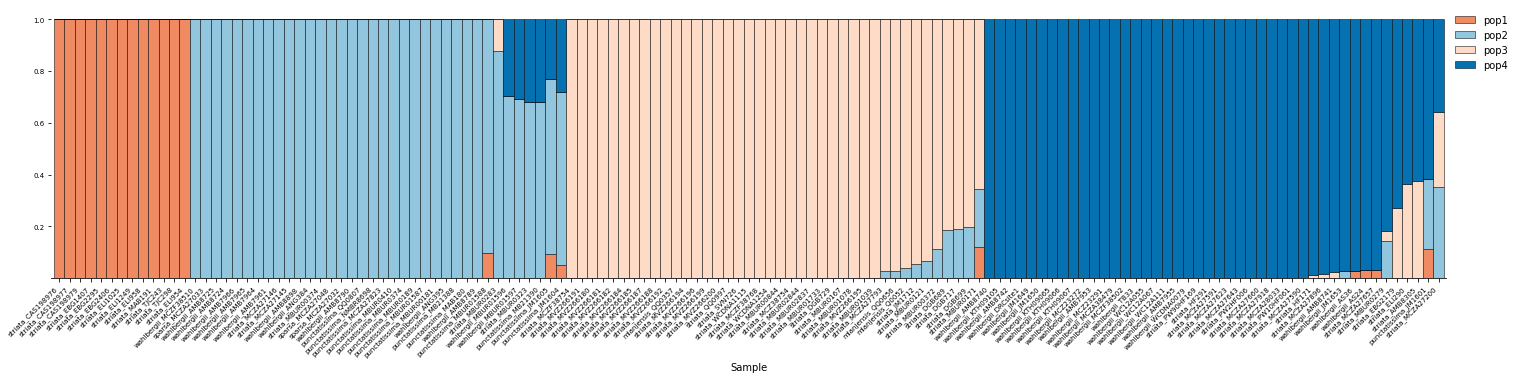

In [22]:
# Now we can make the barplot for the sorted Q dataframe.

# make the stacked barplot
ax = df_sorted_q.plot.bar(stacked=True, 
                          figsize=(25,5), 
                          width=1,
                          color=pal, 
                          fontsize='x-small',
                          edgecolor='black', 
                          linewidth=0.5)

# these commands eliminate the bounding box for the barplot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# this controls rotation of the sample names along the x-axis
ax.set_xticklabels(df_sorted_q.index, rotation=45, ha='right')

# this controls the placement of the legend, as well as 
# font (fontsize), spacing (labelspacing), and bounding box (frameon)
ax.legend(bbox_to_anchor=(1,1), fontsize='medium', labelspacing=0.5, frameon=False)


In [23]:
# Looks really good!

# We can save this plot using the command below:
ax.figure.savefig('Admixture-K4.pdf', bbox_inches='tight')

In [24]:
# We can also save the Q dataframe we created. 

df_sorted_q.to_csv('Sorted-Q4-data.txt', sep=",", index=True, float_format='%.6f')

# Changing the sep= value to ' ' or '\t' will produce white-space or tab-delimited output, 
# rather than a comma-delimited csv output. The float_format='%.6f' ensures that the same 
# number of decimals will be written for the floats (ancestry proportions).

In [25]:
###########################################################################################
# A final advanced topic - changing the order of populations on the figure!

# We may wish to shift the order of the populations, and this is also easy to do.

# It takes a slight edit to the sort function. Here it will return a list of the sorted
# subdataframes, rather than the concatenated sorted subdataframes:

def sort_df_by_pops_nocat(df):
    temp_dfs = []
    for pop in sorted(df['assignment'].unique()):
        temp = df.loc[df['assignment'] == pop].sort_values(by=[pop], ascending=False)
        temp_dfs.append(temp)
    return temp_dfs


In [26]:
# A list of the subdataframes is returned:
sub_dfs = sort_df_by_pops_nocat(df_q)

# There are four subdataframes in this list, and we can merge them in any order 
# by using the index of the list with the concatenate function. Let's say
# we want to move population one to the end of the plot, and shift population two
# to be in between three and four:

df_custom_sort = pd.concat([sub_dfs[2], sub_dfs[1], sub_dfs[3], sub_dfs[0]])

# Remember python indices are zero-based!

# If your K value is higher or lower, make sure to include all the subdataframes in 
# the list for pd.concat() . For example with K=6, you'll need sub_dfs[0] to sub_dfs[5].

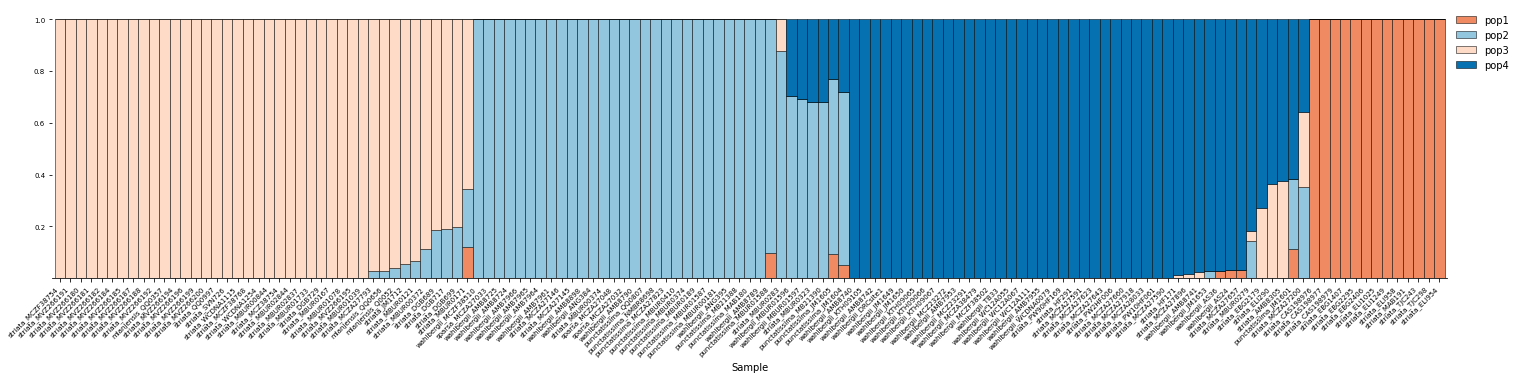

In [27]:
# Now we can make the barplot for the custom sorted Q dataframe.

ax = df_custom_sort.plot.bar(stacked=True, 
                             figsize=(25,5), 
                             width=1,
                             color=pal, 
                             fontsize='x-small',
                             edgecolor='black', 
                             linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticklabels(df_custom_sort.index, rotation=45, ha='right')
ax.legend(bbox_to_anchor=(1,1), fontsize='medium', labelspacing=0.5, frameon=False)

In [28]:
# That looks even better than the automated sorting function, definitely going to save this!
ax.figure.savefig('Admixture-K4-Perfection.pdf', bbox_inches='tight')

In [29]:
# And that's it! Hopefully this will help save some time and effort for an upcoming
# phylogeography figure. Pandas is extremely useful for manipulating dataframes and 
# creating plots, and this is one example of a useful application.